### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook and the quiz questions that follow below.

Start by reading in the libraries and data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60.  First, use **quiz 1** below to state the null and alternative hypotheses for these cases in the cell below. 

- Null : The mean height of everyone in the population is equal to 67.60.
- Alternative : The mean height of everyone in the population is not equal to 67.60. 




`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 
Use **quiz 2** below to assure your answers are correct.  

In [3]:
# population mean height 
full_data['height'].mean()

67.597486973079342

(array([  14.,   29.,   76.,  358.,  473.,  631.,  783.,  441.,  151.,   18.]),
 array([ 56.21949211,  58.21694752,  60.21440294,  62.21185836,
         64.20931377,  66.20676919,  68.20422461,  70.20168002,
         72.19913544,  74.19659086,  76.19404627]),
 <a list of 10 Patch objects>)

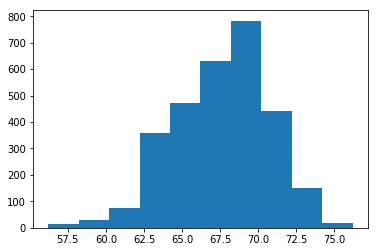

In [4]:
# make a histogram
plt.hist(full_data['height'])

In [5]:
# standard devation of the population heights
np.std(full_data['height'])

3.1189087116821459

In [6]:
# sample
sample1 = full_data.sample(5)
sample1

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [7]:
# sample mean height
sample1['height'].mean()

67.882342520490838

(array([   40.,   184.,   787.,  1496.,  2273.,  2369.,  1625.,   809.,
          359.,    58.]),
 array([ 64.3571538 ,  65.05835045,  65.75954709,  66.46074374,
         67.16194038,  67.86313703,  68.56433367,  69.26553032,
         69.96672696,  70.66792361,  71.36912025]),
 <a list of 10 Patch objects>)

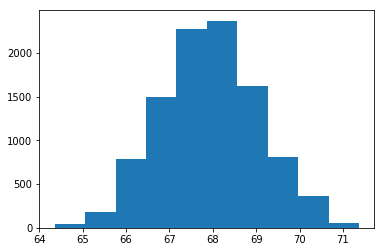

In [8]:
# simulate the sampling distribution 
samples_mean5 = [] 
for _ in range(10000):
    mean5 = sample1.sample(5, replace=True).height.mean()
    samples_mean5.append(mean5)

# show histogram
plt.hist(samples_mean5)

In [9]:
# standard deviation of the sampling mean height
np.std(samples_mean5)

1.141357351999374

`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

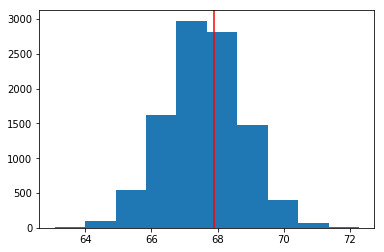

In [10]:
null_mean = full_data.height.mean()
sampling_std_5 = np.std(samples_mean5)

null_vals = np.random.normal(null_mean, sampling_std_5, 10000)

plt.hist(null_vals)
plt.axvline(x=sample1.height.mean(), color='red')

In [11]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
obs_mean = sample1.height.mean() # observed mean

# probability of a statistic higher than observed
prob_more_extreme_high = (null_vals > obs_mean).mean()
    
# probability a statistic is more extreme lower
prob_more_extreme_low = (null_mean - (obs_mean - null_mean) > null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval

0.8034

**The above shows a second possible method for obtaining the p-value. These are pretty different, stability of these values with such a small sample size is an issue. We are essentially shading outside the lines below.**

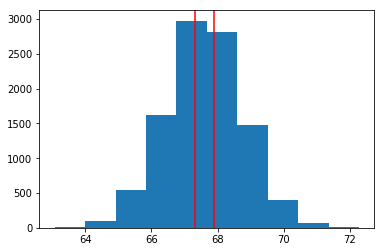

In [12]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [13]:
print(upper_bound, lower_bound)

67.8823425205 67.3126314257


`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

In [14]:
# 300개 값으로 이뤄진 샘플2
sample2 = full_data.sample(300)

# 샘플2에서 얻어진 키의 평균값
obs_mean = sample2.height.mean()
# 67.688767951038926

(array([   16.,   124.,   615.,  1942.,  2937.,  2695.,  1289.,   334.,
           43.,     5.]),
 array([ 66.9998985 ,  67.14359931,  67.28730011,  67.43100091,
         67.57470172,  67.71840252,  67.86210333,  68.00580413,
         68.14950494,  68.29320574,  68.43690654]),
 <a list of 10 Patch objects>)

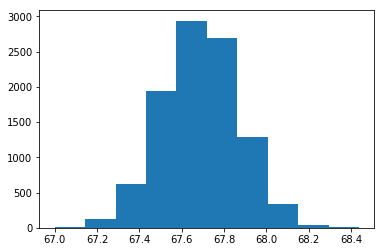

In [15]:
# simulate the sampling distribution 
samples_mean300 = [] 
for _ in range(10000):
    mean = sample2.sample(300, replace=True).height.mean()
    samples_mean300.append(mean)

plt.hist(samples_mean300)

In [20]:
# standard deviation of the sampling mean height
std_sampling_dist300 = np.std(samples_mean300)    
std_sampling_dist300

0.18108485974118899

In [24]:
# 샘플링 분포의 표준편차를 이용해 귀무가설 값을 생성 
null_vals = np.random.normal(null_mean, std_sampling_dist300, 10000)

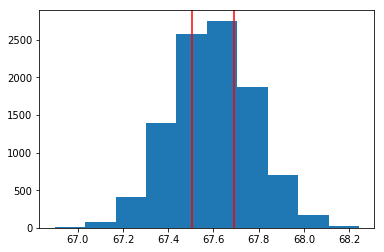

In [25]:
# 상한선 = 샘플로부터 얻어진 평균값
upper_bound = obs_mean
# 하한선 = 귀무가설의 평균 - (샘플의 평균 - 귀무가설의 평균)
lower_bound = null_mean - (obs_mean - null_mean)

# 히스토그램 + 상한선,하한선 표시 
plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [26]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
# 양측 검정의 경우, 귀무가설의 양측 방향으로 좀더 극단적인 값이 있는지를 확인하려고 한다. 

# probability of a statistic lower than observed
# 하한선보다 작은 값들의 평균 
prob_more_extreme_low = (null_vals < lower_bound).mean()
    
# probability a statistic is more extreme higher
# 상한선보다 큰 값들의 평균 
prob_more_extreme_high = (upper_bound < null_vals).mean()

# p-value 
pval = prob_more_extreme_low + prob_more_extreme_high
pval  # With such a large sample size, our sample mean that is super
      # close will be significant at an alpha = 0.1 level.

0.61539999999999995

`5.` Reflect on what happened by answering the final quiz in this concept.

Even with a very small difference between a sample mean and a hypothesized population mean, the difference will end up being significant with a very large sample size.